### Question
Clustering: K-Means <br>
Dataset: Cities_r2.csv  <br>
Apply Data pre-processing (Label Encoding , Data Transformation....) techniques
if necessary. <br>
1. Apply K-Means clustering algorithms (based on total_graduates) to find the group
of customers. <br>
2. Apply K-Means clustering algorithms (based on
effective_literacy_rate_total column) to find the group of customers.

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('Cities_r2.csv')

In [4]:
# Select features for the first clustering (total_graduates)
X1 = df[['total_graduates']]

In [5]:
# Apply Standard Scaling
X1_scaled = StandardScaler().fit_transform(X1)

c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

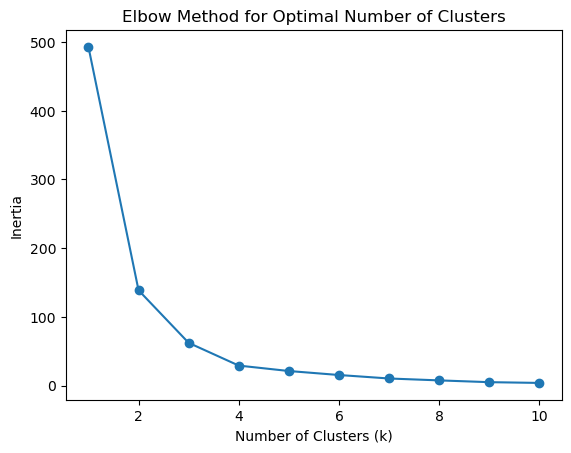

In [6]:
# Apply K-Means clustering for total_graduates
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X1_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [13]:
# Apply K-Means clustering for total_graduates
kmeans1 = KMeans(n_clusters=4, random_state=0)
df['cluster_total_graduates'] = kmeans1.fit_predict(X1_scaled)

c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


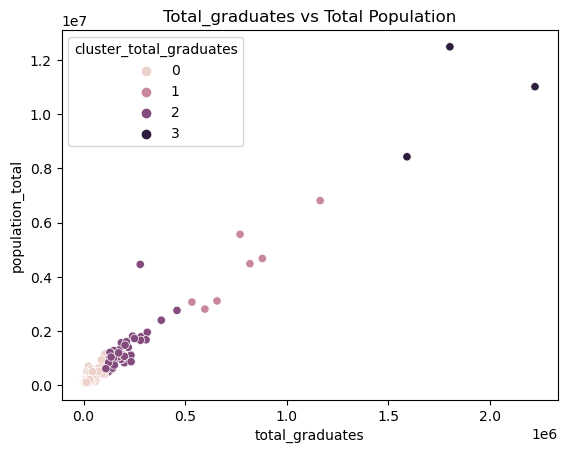

In [14]:
# Scatter plot using Seaborn
sns.scatterplot(x='total_graduates', y='population_total', hue='cluster_total_graduates', data=df)
plt.title('Total_graduates vs Total Population')
plt.show()

In [9]:
# Select features for the second clustering (effective_literacy_rate_total)
X2 = df[['effective_literacy_rate_total']]

In [10]:
# Apply Standard Scaling
X2_scaled = StandardScaler().fit_transform(X2)

In [11]:
# Apply K-Means clustering for effective_literacy_rate_total
kmeans2 = KMeans(n_clusters=3, random_state=42)
df['cluster_effective_literacy_rate'] = kmeans2.fit_predict(X2_scaled)

c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


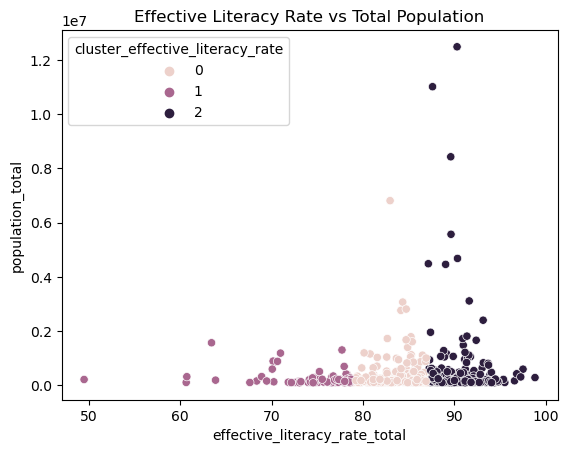

In [12]:
# Scatter plot using Seaborn
sns.scatterplot(x='effective_literacy_rate_total', y='population_total', hue='cluster_effective_literacy_rate', data=df)
plt.title('Effective Literacy Rate vs Total Population')
plt.show()